# Исследование объявлений о продаже квартир

1. Контекст задачи: нам предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
2. Цель проекта: научиться определять рыночную стоимость объектов недвижимости.
3. Наши задачи: выполнить предобработку данных, добавить в таблицу новые столбцы со следующими параметрами, провести исследовательский анализ данных, написать общий вывод.
4. Описание данных: по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Загрузка данных и вводная информация

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os

pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изучил данные из файла. Видно сразу, что есть пропуски, также есть несоответствующие типы данных для отдельных столбцов.

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


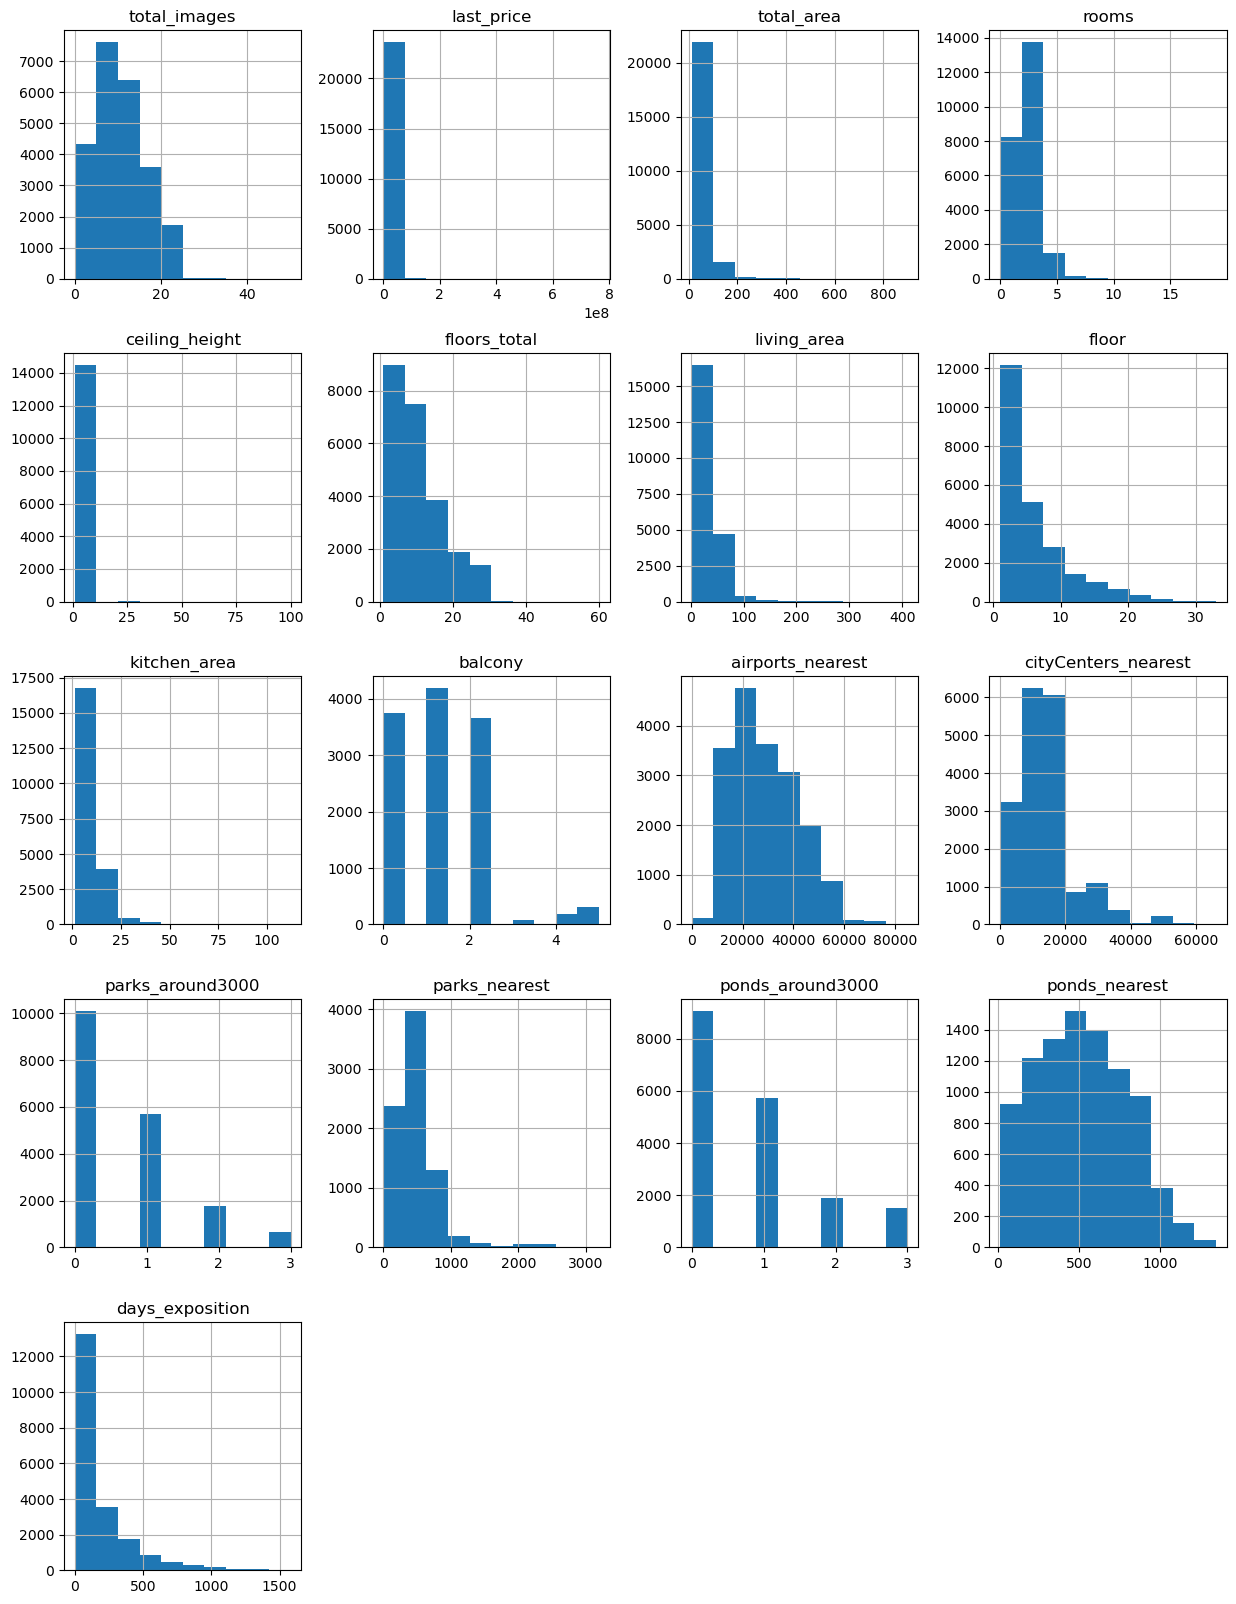

In [9]:
data.hist(figsize=(15, 20))
plt.show()

Просмотрев графики, можно заметить, что в данных есть выбросы, какие-то данные не учитываются. А также присутствуют пропуски.

## Предобработка

### 

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Достаточно много пропусков, но явно не все можно заменить. Например, пропуски из столбцов floors_total, living_area, is_apartment, kitchen_area, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition заменить не получится, поскольку у каждой квартиры свои характеристики, и будет необъективно менять данные, смотря на другие квартиры.

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('Unknown')
data['is_apartment'] = data['is_apartment'].fillna(False)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data.dropna(subset = ['floors_total'])

/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/3550502748.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


К пропускам в данных могли привести такие причины, как человеческий фактор, либо же система заполения данных дала сбой.

### 

In [18]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest      18

Нужно заменить тип у столбца "first_day_exposition" на тип datetime. Столбец "is_apartment" на тип bool. Столбец "locality_name" на тип str.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest      18

In [21]:
print('floors_total:', data.loc[data['floors_total'] % 1 != 0, 'floors_total'].count())
print('balcony:', data.loc[data['balcony'] % 1 != 0, 'balcony'].count())
print('parks_around3000:', data.loc[data['parks_around3000'] % 1 != 0, 'parks_around3000'].count())
print('ponds_around3000:', data.loc[data['ponds_around3000'] % 1 != 0, 'ponds_around3000'].count())

floors_total: 0
balcony: 0
parks_around3000: 0
ponds_around3000: 0


Проверили все параметры, в которых могут быть ошибки в виде нецелых чисел. Таких параметров нет.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT00:00:00')
data['is_apartment'] = data['is_apartment'].astype(bool, errors = 'ignore')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony              

Нужно изменить тип данных, чтобы в дальнейшем возможно было работать и анализировать эти же данные, и не возникало проблем. Например, столбец "first_day_exposition" мы не смогли бы изучить, так как мешал его формат. Так же есть столбец "days_exposition", в котором есть нецелые значения. И количество этих значений превышает 10% от всех данных в этом столбце, поэтому менять такие данные на целые мы не можем, ведь, возможно, так и должно быть.

### 

In [27]:
print(data['locality_name'].unique())
print(data['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Уникальных значений достаточно много, но есть и неявные дубликаты, которые нужно устранить.

In [29]:
data['locality_name'] = (data['locality_name'].str.lower().str.replace('ё', 'е').replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок', 'садовое товарищество', 'деревня', 'поселок', 'село'], '', regex=True))
data['locality_name'] = data['locality_name'].str.strip()

In [30]:
print(data['locality_name'].unique())
print(data['locality_name'].nunique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'федоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'новая ропша' 'павловск' 'пикколово' 'всеволожск'
 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи' 'аннино'
 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское' 'красное'
 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет' 'сланцы'
 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодежное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалево' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'вартемяги' 'тельмана' 'севас

Как мы можем заметить количество уникальных значений убавилось, а значит мы избавились от неяных дубликатов.

---
### Добавление новых столбцов

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [34]:
def type_fl(row):
  if row['floor'] == 1:
    return 'первый'
  elif row['floor'] == row['floors_total']:
    return 'последний'
  else:
    return 'другой'

Поскольку нам для анлиза нужен будет числовой вариант категориальных значений, то:

In [36]:
def numeric_type_fl(row):
  if row['floor_type'] == 'первый':
    return 1
  elif row['floor_type'] == 'другой':
    return 2
  else:
    return 3

In [37]:
data['price_metre'] = round(data['last_price'] / data['total_area'], 2)
data['day_advert'] = data['first_day_exposition'].dt.weekday
data['month_advert'] = data['first_day_exposition'].dt.month
data['year_advert'] = data['first_day_exposition'].dt.year
data['floor_type'] = data.apply(type_fl, axis = 1)
data['numeric_floor_type'] = data.apply(numeric_type_fl, axis = 1)
data['km_center'] = round(data['cityCenters_nearest'] / 1000)

Проведя предобработку данных, было замечено большое количество ошибок.
1. Например, были пропуски у многих столбцов. От них мы избавились либо удалением строк с пропущенными значениями(например, столбец "floors_total"), либо заменяли на среднее значение из столбца(например, столбец "ceinung_height"), либо вовсе оставляли неизменно, потому что не было возможности как-то подправить эти пропуски.
2. Также были столбцы с неподходящими для анализа типами данных, которые мы тоже успешно поменяли птуем форматирования самих данных(например, столбец "first_day_exposition") и проверки значений столбцов на их корректность(например, столбец "floors_total").
3. Помимо всего этого были еще неявные дубликаты, которые мы убрали через замену всего слова или частей слова, которые не несли никакой полезной информации, на пустую строку, тем самым уменьшая количество уникальных значений.

# Исследовательская часть

array([[<Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'kitchen_area'}>],
       [<Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>],
       [<Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'numeric_floor_type'}>],
       [<Axes: title={'center': 'parks_nearest'}>, <Axes: >, <Axes: >]],
      dtype=object)

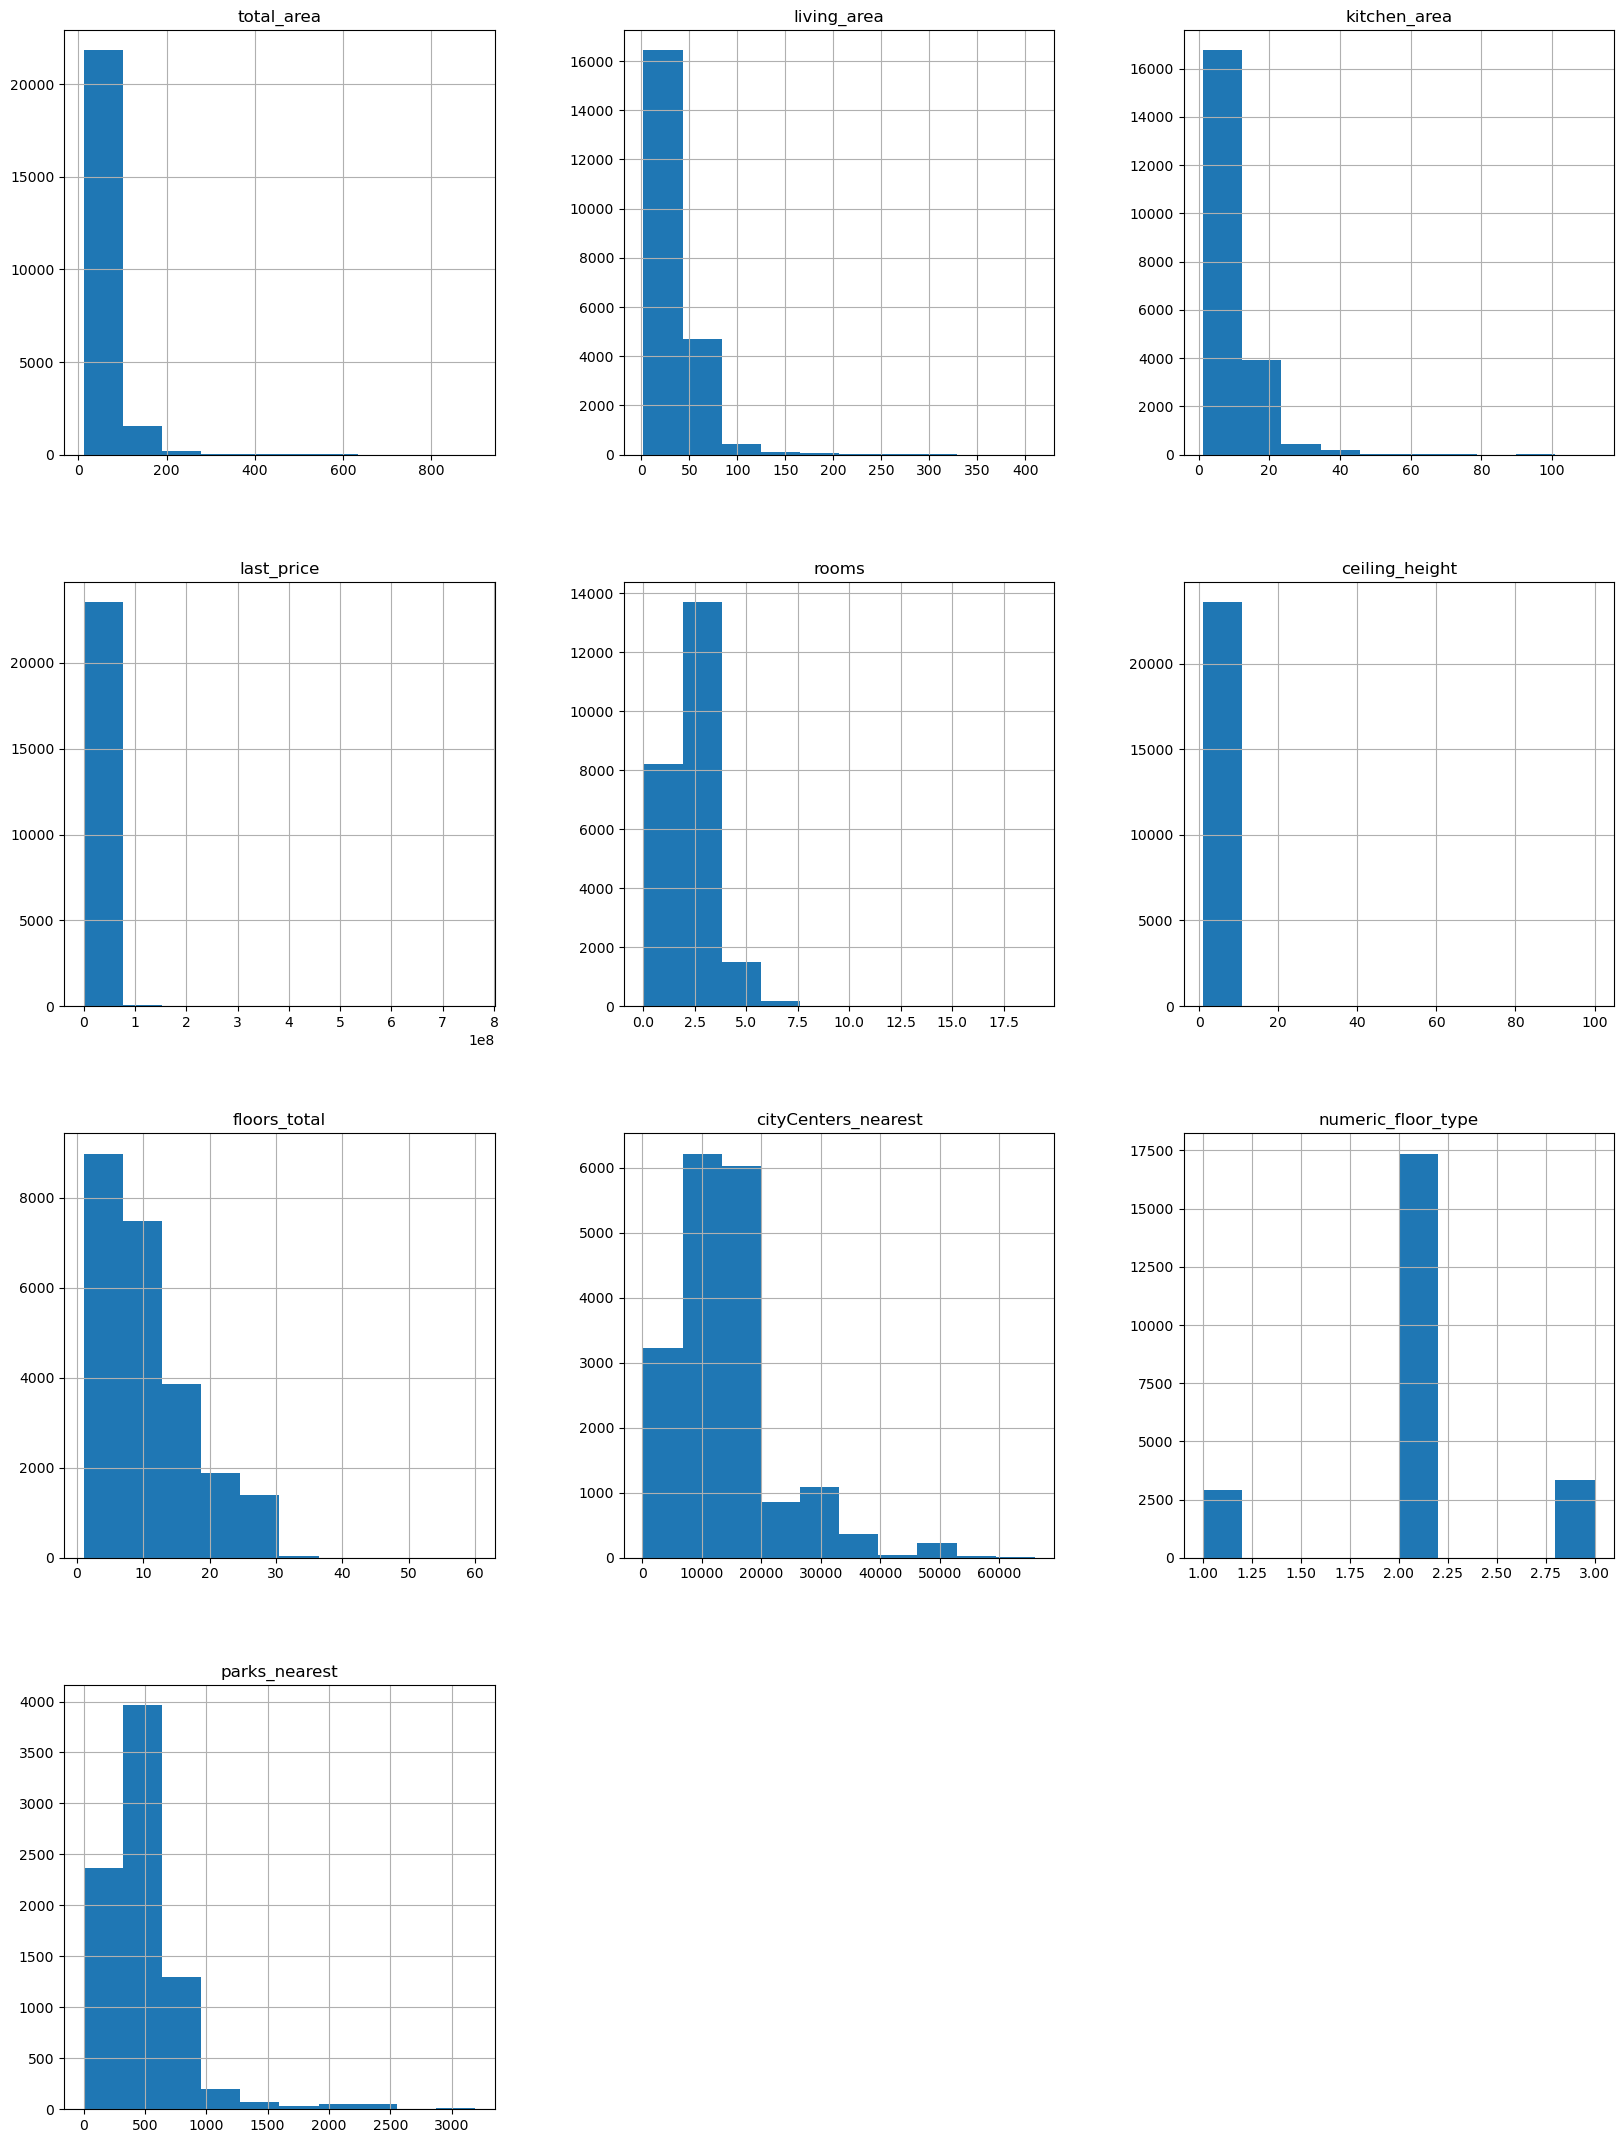

In [40]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'cityCenters_nearest', 'numeric_floor_type', 'parks_nearest']].hist(figsize=(20, 27))

Однозначно можно сказать, что есть выбросы в столбце ceiling_height. Так же можно предположить, что в столбцах last_price, cityCenters_nearest, parks_nearest также есть выбросы.

In [42]:
def high_ceiling(height):
  if height >= 20:
    return height / 10
  else:
    return height

In [43]:
data['ceiling_height'] = data['ceiling_height'].apply(high_ceiling)

По гистограмме видно, что есть выбросы в данных о высоте потолков. Встречаются высоты, превышающие 10 м. Возможно, была допущена ошибка и не указали десятую часть от высоты. Теперь следует проверить, не осталось ли выбросов в данном столбце.

In [45]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.698849
std          0.253641
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

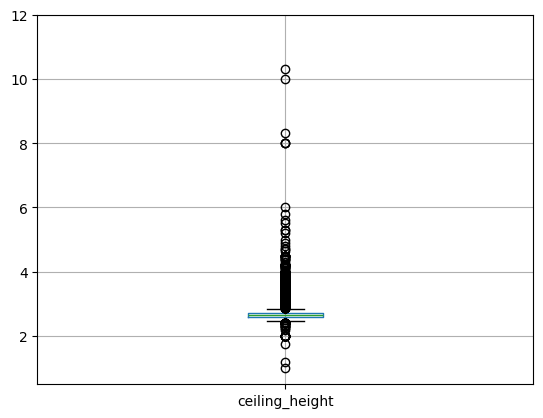

In [46]:
data.boxplot(column = 'ceiling_height')
plt.ylim(0.5, 12)
plt.show()

Как видно на диаграмме рассеивания, есть выбросы после 6 и до 2 метров.

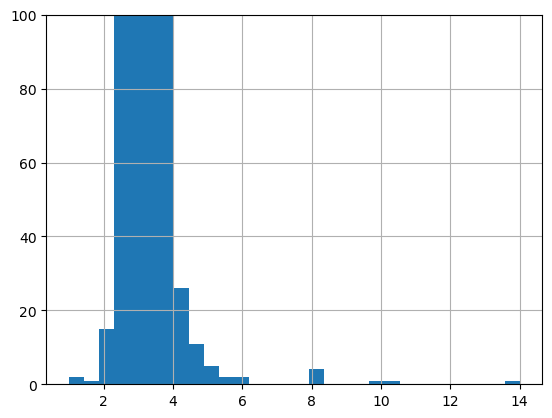

In [48]:
data['ceiling_height'].hist(bins = 30)
plt.ylim(0, 100)
plt.show()

А теперь можно заметить, что есть малое количество значений не меньших 4 и меньших 2, учитывая, что мы изменили масштаб до 100 в оси y. Но чтобы удалять выбросы, нужно проверить какое долю они занимают от общего числа данных. Всего данных у нас в этом столбце: 23613.

In [50]:
data.query('(ceiling_height >= 4) | (ceiling_height < 2)')['ceiling_height'].count() / 23613

0.004023207555160293

Эти данные занимают меньше процента, следовательно, можем их удалить.

In [52]:
data = data.query('(ceiling_height < 4) & (ceiling_height >= 2)')

С высотами разобрались. Осталось понять, есть ли выбросы в остальных столбцах.

In [54]:
data['last_price'].describe()

count    2.351800e+04
mean     6.467865e+06
std      1.068755e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

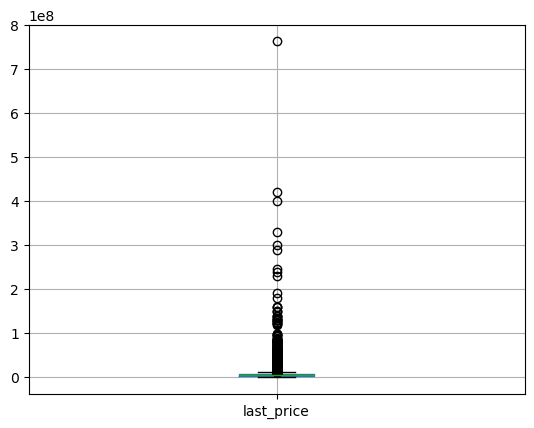

In [55]:
data.boxplot(column = 'last_price')

Видно, что есть редкие выбросы после значения 2. Проверим это на гистограмме.

In [57]:
data['last_price'].count()

23518

Узнали количество данных для будушего анализа.

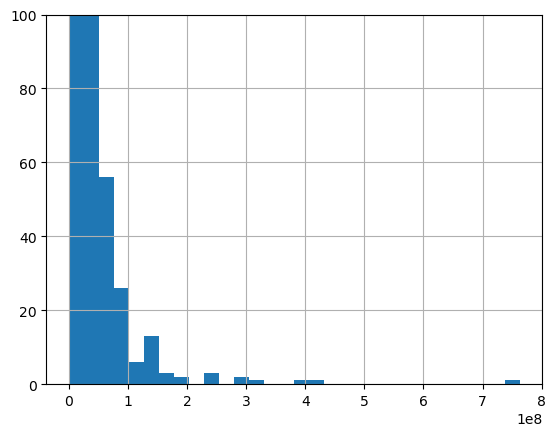

In [59]:
data['last_price'].hist(bins = 30)
plt.ylim(0, 100)
plt.show()

Теперь видно, что значений больших 1 совсем немного. Проверим какую долю они занимают. Всего данных в этом столбце 23518.

In [61]:
data.query('last_price > 10000000')['last_price'].count() / 23518

0.11284973212007823

Получаем, что доля равна 11%, что слишком много для удаления. Немного увеличим значение, после которого хотим удалить.

In [63]:
data.query('last_price > 15000000')['last_price'].count() / 23518

0.04949400459222723

Всего 5%, можем удалять.

In [65]:
data = data.query('last_price <= 15000000')

Рассмотрим столбец cityCenters_nearest.

In [67]:
data['cityCenters_nearest'].count()

16873

Узнали количество данных в этом столбце. Понадобится в будущем анализе.

<Axes: >

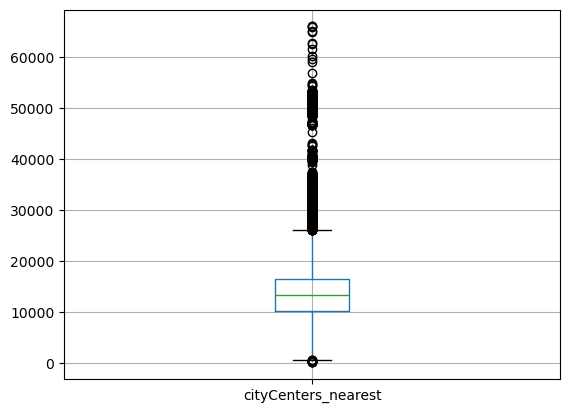

In [69]:
data.boxplot(column = 'cityCenters_nearest')

In [70]:
data['cityCenters_nearest'].describe()

count    16873.000000
mean     14684.062704
std       8557.216498
min        208.000000
25%      10186.000000
50%      13382.000000
75%      16549.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

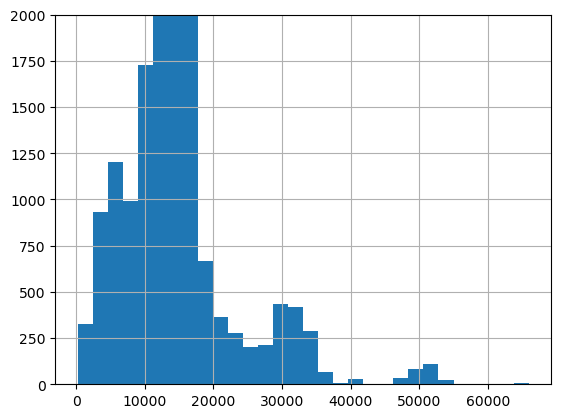

In [71]:
data['cityCenters_nearest'].hist(bins = 30)
plt.ylim(0, 2000)
plt.show()

Мы можем понять, что есть выбросы начиная с 35000, но на 50000 есть подъем, поэтому рассмотрим значения после 50000. Проверим на велицину доли этих значений.

In [73]:
data.query('cityCenters_nearest > 50000')['cityCenters_nearest'].count() / 16873

0.010786463580868844

1%, следовательно, можем удалять.

In [75]:
data = data.drop(data[data['cityCenters_nearest'] > 50000].index)

Удаляем выбросы таким образом, чтобы не задеть пропущенные значения. Ведь в этом и следующих столбцах пропуски занимают являются большой частью данных.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22172 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22172 non-null  int64         
 1   last_price            22172 non-null  float64       
 2   total_area            22172 non-null  float64       
 3   first_day_exposition  22172 non-null  datetime64[ns]
 4   rooms                 22172 non-null  int64         
 5   ceiling_height        22172 non-null  float64       
 6   floors_total          22172 non-null  int64         
 7   living_area           20453 non-null  float64       
 8   floor                 22172 non-null  int64         
 9   is_apartment          22172 non-null  bool          
 10  studio                22172 non-null  bool          
 11  open_plan             22172 non-null  bool          
 12  kitchen_area          20081 non-null  float64       
 13  balcony              

Рассмотрим столбец parks_nearest.

In [79]:
data['parks_nearest'].count()

7111

Количество значений в этом столбце для будущего анализа.

In [81]:
data['parks_nearest'].describe()

count    7111.000000
mean      493.423007
std       335.870755
min         1.000000
25%       293.000000
50%       458.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

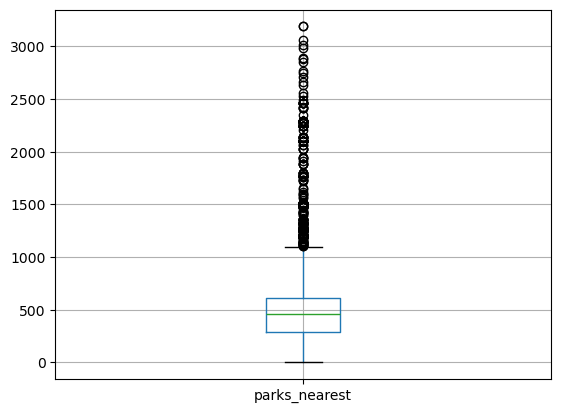

In [82]:
data.boxplot(column = 'parks_nearest')

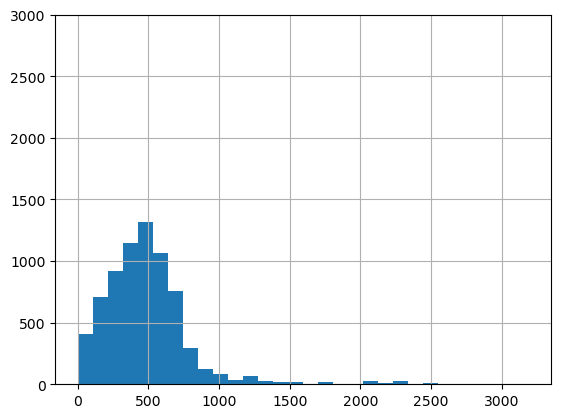

In [83]:
data['parks_nearest'].hist(bins = 30)
plt.ylim(0, 3000)
plt.show()

Благодаря гистограмме, и нашим остальным данным можно заметить, что присутствуют выбросы после значения 1500.

In [85]:
data.query('parks_nearest >= 1500')['parks_nearest'].count() / 7020

0.020227920227920228

Количество таких данных занимает около 2%, можем удалять.

In [87]:
data = data.drop(data[data['parks_nearest'] >= 1500].index)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22030 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22030 non-null  int64         
 1   last_price            22030 non-null  float64       
 2   total_area            22030 non-null  float64       
 3   first_day_exposition  22030 non-null  datetime64[ns]
 4   rooms                 22030 non-null  int64         
 5   ceiling_height        22030 non-null  float64       
 6   floors_total          22030 non-null  int64         
 7   living_area           20323 non-null  float64       
 8   floor                 22030 non-null  int64         
 9   is_apartment          22030 non-null  bool          
 10  studio                22030 non-null  bool          
 11  open_plan             22030 non-null  bool          
 12  kitchen_area          19956 non-null  float64       
 13  balcony              

Проверили на количество данных. Убедились, что большая часть данных не потеряна. Теперь с уверенностью можно сказать, мы избавились от всех редких выбросов, и теперь нам надо восстановить верные индексы строк.

In [90]:
data = data.reset_index(drop = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metre,day_advert,month_advert,year_advert,floor_type,numeric_floor_type,km_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,другой,2,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,82920.79,1,12,2018,первый,1,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,другой,2,14.0
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.00,1,6,2018,другой,2,8.0
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,NaN,55.0,95065.79,0,9,2018,другой,2,NaN


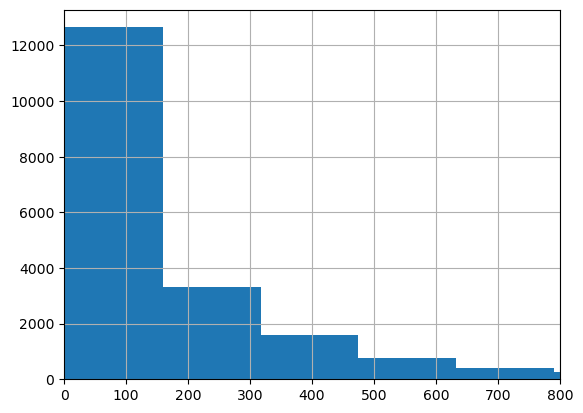

In [91]:
data['days_exposition'].hist()
plt.xlim(0, 800)
plt.show()

<Axes: >

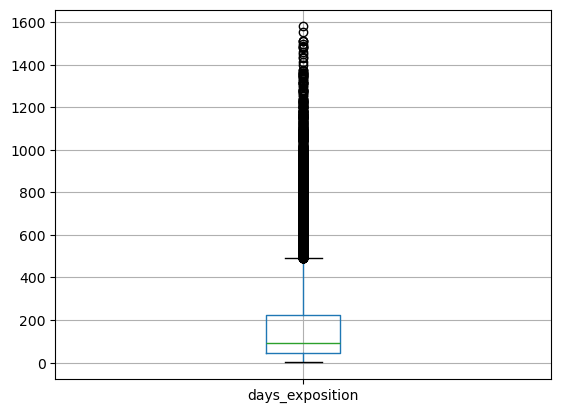

In [92]:
data.boxplot(column = 'days_exposition')

In [93]:
data['days_exposition'].describe()

count    19267.000000
mean       175.203924
std        213.665522
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [94]:
print('mean:', data['days_exposition'].mean())
print('median:', data['days_exposition'].median())

mean: 175.20392380754657
median: 92.0


Опираясь на среднее и 2 квартиль, можно сказать, что продажа обычно занимает около 90-95 дней. Быстрыми можно считать те, которые продались за 44 дня и раньше. А необычно долгими, согласно графику рассеивания, дольше 222 дня.

In [96]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_metre', 'day_advert',
       'month_advert', 'year_advert', 'floor_type', 'numeric_floor_type',
       'km_center'],
      dtype='object')

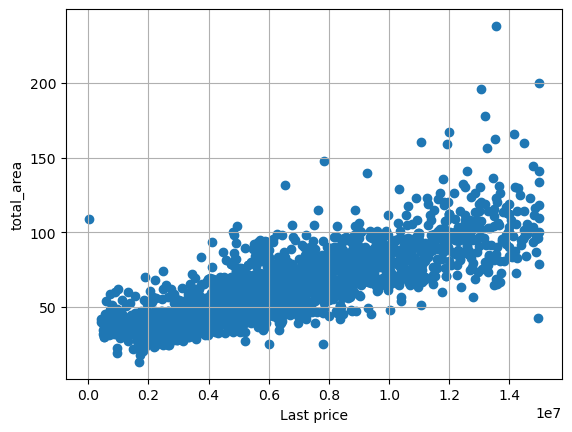

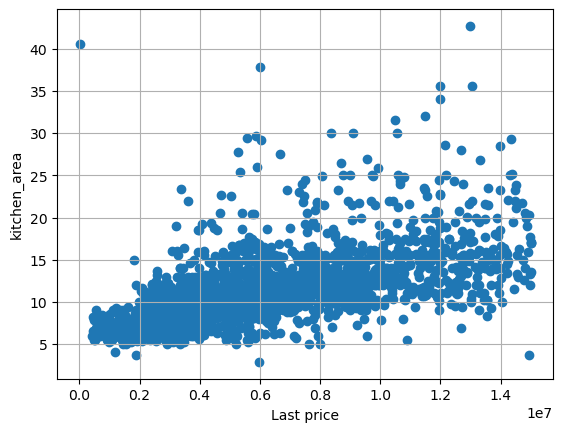

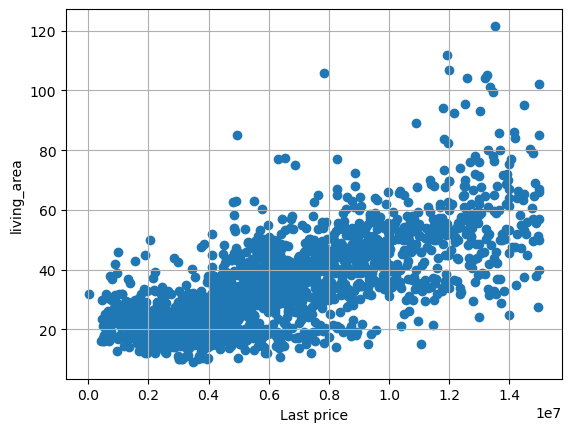

/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/2356900787.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_mean[i], y=data_mean['last_price'], palette='viridis')


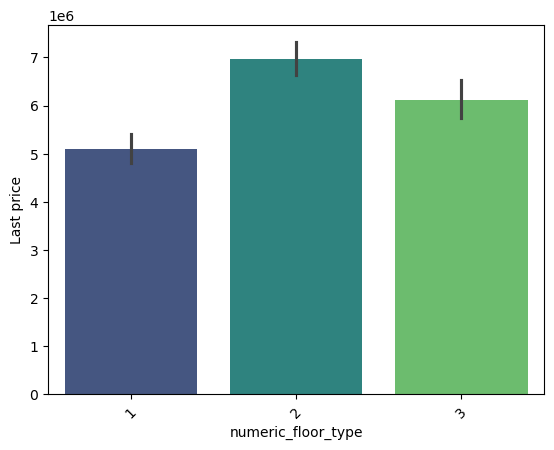

/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/2356900787.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_mean[i], y=data_mean['last_price'], palette='viridis')


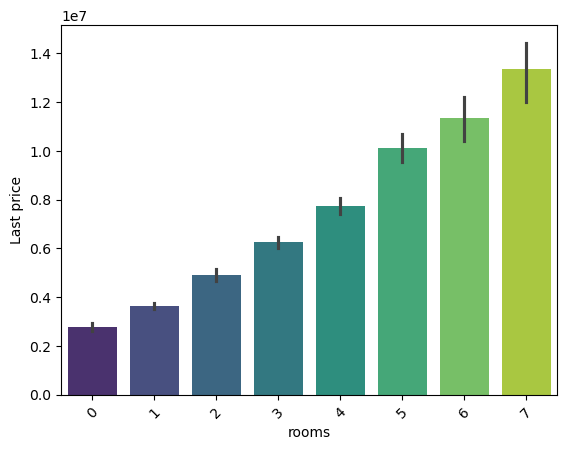

/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/2356900787.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_mean[i], y=data_mean['last_price'], palette='viridis')


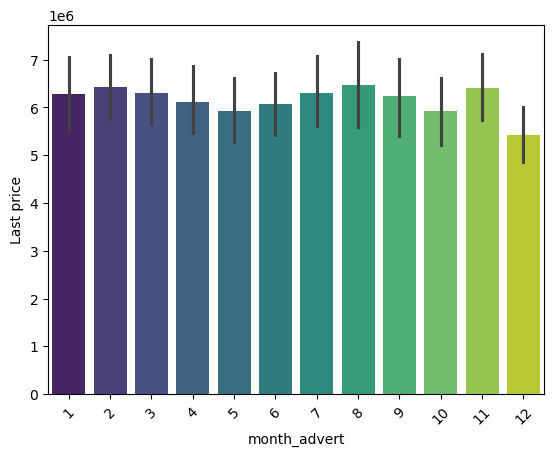

/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/2356900787.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_mean[i], y=data_mean['last_price'], palette='viridis')


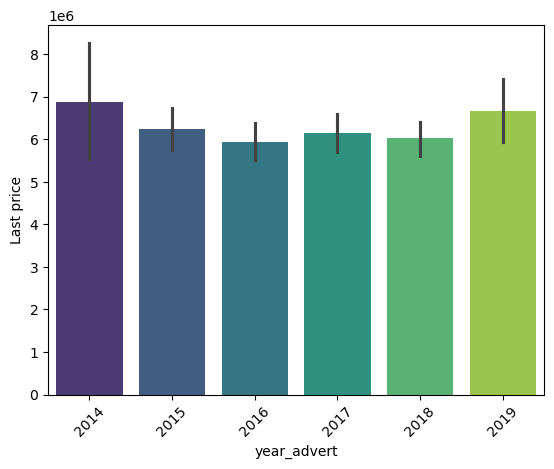

In [97]:
import seaborn as sns

a = ['total_area', 'numeric_floor_type', 'living_area', 'kitchen_area', 'rooms', 'month_advert', 'year_advert']
sq = ['total_area', 'kitchen_area', 'living_area']
oth = ['numeric_floor_type', 'rooms', 'month_advert', 'year_advert']
data_pivot = data.pivot_table(index = 'last_price', values = a)
data_mean = data.groupby(oth)['last_price'].mean().reset_index()

for i in sq:
  plt.scatter(data_pivot.index, data_pivot[i])
  plt.grid(True)
  plt.xlabel('Last price')
  plt.ylabel(i)
  plt.show()

for i in oth:
  sns.barplot(x=data_mean[i], y=data_mean['last_price'], palette='viridis')
  plt.xlabel(i)
  plt.ylabel('Last price')
  plt.xticks(rotation=45)
  plt.show()


Как и ожидалось, цена зависит в большей степени от общей площади помещения, жилой площади, количества комнат. В меньшей степени зависит от площади кухнии типа этажа, на котором находится объект, а от остальных данных практически не зависит. Чтобы проверить данный вывод, можно посмотреть на корреляцию:

In [99]:
for i in a:
  print(i, data['last_price'].corr(data[i]))

total_area 0.7439859780946428
numeric_floor_type 0.04741649801289467
living_area 0.637156298818011
kitchen_area 0.5313918065173222
rooms 0.4944952099060659
month_advert 0.00023786316420087167
year_advert -0.014391743958849488


Как и ожидалось, не категориальные признаки стоят на нужных местах, а по категориальным через корреляцию Пирсона ничего сказать не можем.

                 rooms  mean_price_m2
locality_name                        
санкт-петербург  14319  105778.390699
мурино             586   83382.564589
кудрово            470   93873.020139
шушары             439   76267.270155
всеволожск         395   66553.944019
пушкин             350  101072.882794
колпино            332   73842.676221
парголово          327   87110.874551
гатчина            306   68584.166319
выборг             234   57199.487225


/var/folders/td/s_0q2gb952xg9pgq3lhgqw740000gn/T/ipykernel_50813/2663559629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_pivot_1.index, y=data_pivot_1['mean_price_m2'], palette='viridis')


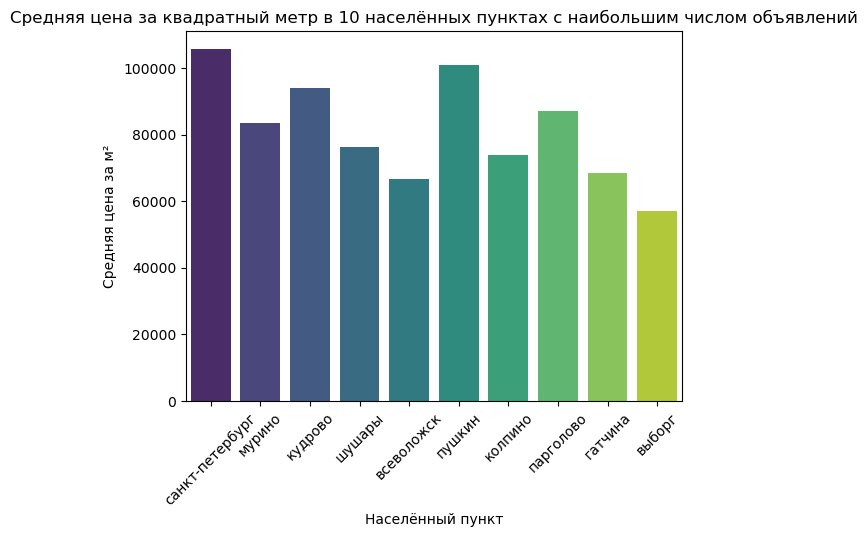

санкт-петербург
выборг


In [101]:
data3 = data.groupby('locality_name')['rooms'].count().sort_values(ascending = False).head(10).index.tolist()
data_pivot_1 = data.pivot_table(index = 'locality_name', values = ['rooms', 'total_area', 'last_price'], aggfunc = {'rooms':'count', 'last_price':'sum', 'total_area':'sum'}).loc[data3, :]
data_pivot_1['mean_price_m2'] = data_pivot_1['last_price'] / data_pivot_1['total_area']
print(data_pivot_1.loc[:, ['rooms', 'mean_price_m2']])

sns.barplot(x=data_pivot_1.index, y=data_pivot_1['mean_price_m2'], palette='viridis')
plt.xlabel('Населённый пункт')
plt.ylabel('Средняя цена за м²')
plt.title('Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений')
plt.xticks(rotation=45)
plt.show()

print(data_pivot_1['mean_price_m2'].idxmax())
print(data_pivot_1['mean_price_m2'].idxmin())

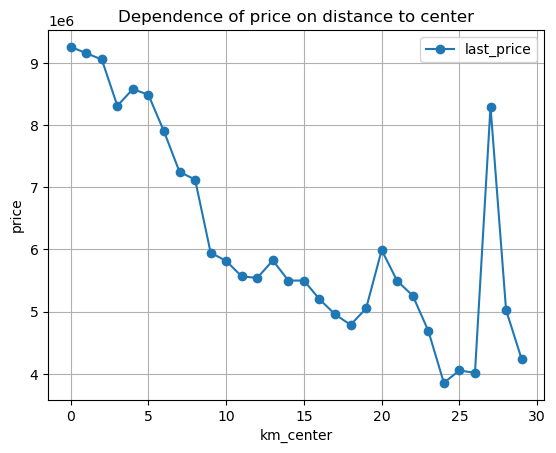

In [102]:
data4 = data.query('locality_name == "санкт-петербург"')
data4 = data4.groupby('km_center')['last_price'].mean().reset_index()
data4 = data4.sort_values(by='km_center', ascending=True)
data4.plot(x = 'km_center', y = 'last_price', style = 'o-', grid = True)
plt.title('Dependence of price on distance to center')
plt.ylabel('price')
plt.show()

По графику видно, что до 20 км цена квартиры зависит от расстояния до центра. В конце происходит уже не полная зависимость. В таких примерах будем считать, что влияют уже другие факторы.

## Финальный вывод

* Мне был дан кейс, и я провел предобработку и небольшой анализ данных. Проведя предобработку данных, было замечено большое количество ошибок. Например, были пропуски у многих столбцов. От них мы избавились либо удалением строк с пропущенными значениями(например, столбец "floors_total"), либо заменяли на среднее значение из столбца(например, столбец "ceinung_height"), либо вовсе оставляли неизменно, потому что не было возможности как-то подправить эти пропуски. Также были столбцы с неподходящими для анализа типами данных, которые мы тоже успешно поменяли птуем форматирования самих данных(например, столбец "first_day_exposition") и проверки значений столбцов на их корректность(например, столбец "floors_total"). Помимо всего этого были еще неявные дубликаты, которые мы убрали через замену всего слова или частей слова, которые не несли никакой полезной информации, на пустую строку, тем самым уменьшая количество уникальных значений. В процессе анализа данных избавился от редких и выбивающихся значений в данных, при этом учитывая количество пропусков в столбцах(чтобы не удалялось большая часть данных при удалении выбросов); изучил, как быстро продавались квартиры - продажа обычно занимает около 90-95 дней, быстрыми можно считать те, которые продались раньше 44 дней, а необычно долгими, согласно гистограмме, дольше 222 дней; определил факторы, которые больше всего влияют на общую (полную) стоимость объекта: общая площадь помещения, жилая площадь, количество комнат и типом этажа, на котором находитяс квартира; посчитал среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений; описал, как стоимость объектов зависит от расстояния до центра города — зависит в первые 20 км от центра города, чем дальше квартира от центра города, тем дешевле она будет. После этого расстояния влияют уже другие факторы. построил график изменения средней цены для каждого километра от центра Петербурга.
* В итоге проделанной работы мы определили факторы, с помощью которых можно определять рыночную стоимость объектов недвижимости.
* Рекомендации для заказчиков. Факторы, на которые стоит обращать внимание: общая площадь объекта; жилая площадь; если это квартира, то на каком этаже расположена; количество комнат; площадь кухни.


